# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [13]:
dfbase = pd.read_csv('appl_1980_2014.csv', sep= ',')

In [14]:
df = dfbase.copy()

### Step 4.  Check out the type of the columns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [20]:
pd.to_datetime(dfbase['Date'])

0      2014-07-08
1      2014-07-07
2      2014-07-03
3      2014-07-02
4      2014-07-01
          ...    
8460   1980-12-18
8461   1980-12-17
8462   1980-12-16
8463   1980-12-15
8464   1980-12-12
Name: Date, Length: 8465, dtype: datetime64[ns]

In [22]:
dfbase.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 6.  Set the date as the index

In [23]:
dfbase.set_index('Date', inplace=True) # df= df.set_index('Date')

In [25]:
dfbase.index

Index(['2014-07-08', '2014-07-07', '2014-07-03', '2014-07-02', '2014-07-01',
       '2014-06-30', '2014-06-27', '2014-06-26', '2014-06-25', '2014-06-24',
       ...
       '1980-12-26', '1980-12-24', '1980-12-23', '1980-12-22', '1980-12-19',
       '1980-12-18', '1980-12-17', '1980-12-16', '1980-12-15', '1980-12-12'],
      dtype='object', name='Date', length=8465)

<AxesSubplot:xlabel='Date'>

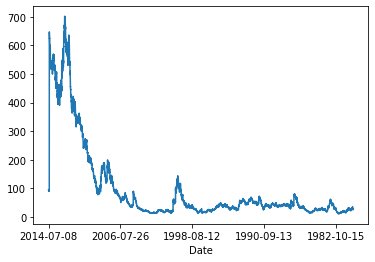

In [27]:
dfbase['Close'].plot()

### Step 5. Transform the Date column as a datetime type

In [29]:
df['Date'] = pd.to_datetime(df['Date'])

KeyError: 'Date'

In [ ]:
df.dtypes

### Step 6.  Set the date as the index

In [ ]:
df.set_index('Date', inplace=True) # df= df.set_index('Date')

<AxesSubplot:xlabel='Date'>

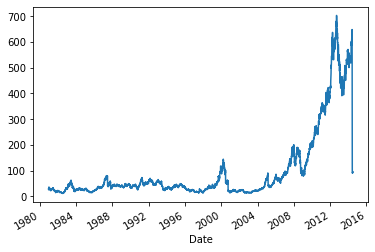

In [31]:
df.Close.plot()

### Step 7.  Is there any duplicate dates?

In [36]:
mask = df.index.duplicated()

In [37]:
df[mask]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,


In [38]:
mask.sum()

0

In [32]:
df['Date'].duplicated(keep='last')
# df.duplicated?

KeyError: 'Date'

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [41]:
df.sort_index(ascending=False, inplace=True)

In [42]:
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 9. Get the last business day of each month

In [20]:
df.info


<bound method DataFrame.info of             Date   Open   High    Low  Close     Volume  Adj Close
0     2014-07-08  96.27  96.80  93.92  95.35   65130000      95.35
1     2014-07-07  94.14  95.99  94.10  95.97   56305400      95.97
2     2014-07-03  93.67  94.10  93.20  94.03   22891800      94.03
3     2014-07-02  93.87  94.06  93.09  93.48   28420900      93.48
4     2014-07-01  93.52  94.07  93.13  93.52   38170200      93.52
...          ...    ...    ...    ...    ...        ...        ...
8460  1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41
8461  1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
8462  1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
8463  1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
8464  1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45

[8465 rows x 7 columns]>

### Step 10.  What is the difference in days between the first day and the oldest

In [23]:
df.index?

Type:        RangeIndex
String form: RangeIndex(start=0, stop=8465, step=1)
Length:      8465
File:        c:\users\valentin.gonzalez\anaconda3\lib\site-packages\pandas\core\indexes\range.py
Docstring:  
Immutable Index implementing a monotonic integer range.

RangeIndex is a memory-saving special case of Int64Index limited to
representing monotonic ranges. Using RangeIndex may in some instances
improve computing speed.

This is the default index type used
by DataFrame and Series when no explicit index is provided by the user.

Parameters
----------
start : int (default: 0), range, or other RangeIndex instance
    If int and "stop" is not given, interpreted as "stop" instead.
stop : int (default: 0)
step : int (default: 1)
dtype : np.int64
    Unused, accepted for homogeneity with other index types.
copy : bool, default False
    Unused, accepted for homogeneity with other index types.
name : object, optional
    Name to be stored in the index.

Attributes
----------
start
stop
step

M

### Step 11.  How many months in the data we have?

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

### BONUS: Create your own question and answer it.